# Installing EasyOCR to the Machine

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 29.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import imutils

import easyocr

In [54]:
#load the images

image= cv2.imread('/content/drive/MyDrive/Colab folder/Car/CAR01.jpg')

# Filtering and Edge detection

OpenCV

In [55]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [44]:
filter= cv2.bilateralFilter(gray, 11,17,17)
edge= cv2.Canny(filter, 30,200)

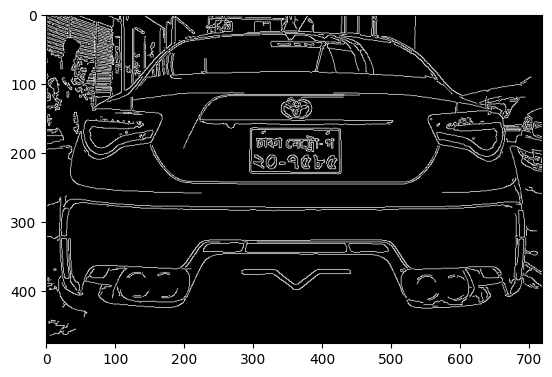

In [45]:
#Converting color

plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

**Extracting Counters**

In [56]:
ext_count= cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(ext_count)
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [57]:
location= None

for contour in contours:
    apprx= cv2.approxPolyDP(
        contour, 10, True)

    if len(apprx)==4:
      location=apprx

      break


In [58]:
location

array([[[296, 166]],

       [[299, 231]],

       [[428, 229]],

       [[426, 166]]], dtype=int32)

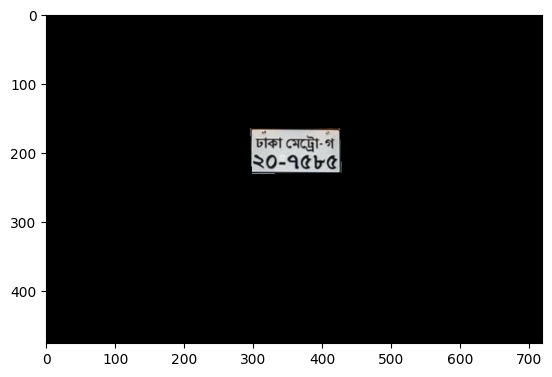

In [49]:
#masking
#extracting the plate

msk= np.zeros(gray.shape, np.uint8)

extracted_plate= cv2.drawContours(msk, [location], 0,255, -1)
extracted_plate= cv2.bitwise_and(image, image, mask=msk)

plt.imshow(cv2.cvtColor(extracted_plate, cv2.COLOR_BGR2RGB))

In [50]:
(x, y)= np.where(msk==255)

(x1, y1)= (np.min(x), np.min(y))
(x2, y2)= (np.max(x), np.max(y))

final_plate= gray[x1:x2+1,
                  y1:y2+1]

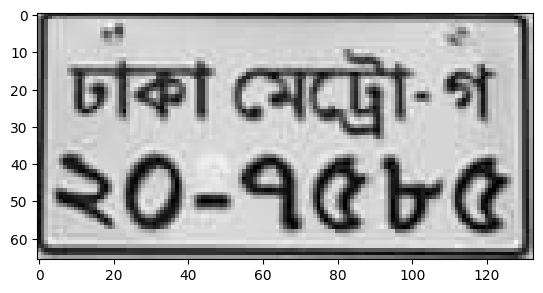

In [51]:
#final plate

plt.imshow(cv2.cvtColor(final_plate, cv2.COLOR_BGR2RGB))

# Apply EasyOCR

In [59]:
read_char= easyocr.Reader(['bn'])  #bangla character reading with 'bn'

detected= read_char.readtext(final_plate)  #read from final extracted plate


In [53]:
#show the detected number

detected

[([[4, 6], [126, 6], [126, 36], [4, 36]], 'ঢাকা মেট্রো গ', 0.6012377792431932),
 ([[2, 32], [130, 32], [130, 64], [2, 64]], '২০-৭৫৮৫', 0.9955905703947492)]